In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

load Dataset

In [2]:
from google.colab import files
df = files.upload()

Saving dataset.csv to dataset.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(df['dataset.csv']))
print(df.head())
print("\nShape:", df.shape)
print("\nColumn Information:\n")
print(df.info())

                              name  \
0     2024 Jeep Wagoneer Series II   
1  2024 Jeep Grand Cherokee Laredo   
2         2024 GMC Yukon XL Denali   
3       2023 Dodge Durango Pursuit   
4            2024 RAM 3500 Laramie   

                                         description   make           model  \
0  \n      \n        Heated Leather Seats, Nav Sy...   Jeep        Wagoneer   
1  Al West is committed to offering every custome...   Jeep  Grand Cherokee   
2                                                NaN    GMC        Yukon XL   
3  White Knuckle Clearcoat 2023 Dodge Durango Pur...  Dodge         Durango   
4  \n      \n        2024 Ram 3500 Laramie Billet...    RAM            3500   

   year    price                                             engine  \
0  2024  74600.0                            24V GDI DOHC Twin Turbo   
1  2024  50170.0                                                OHV   
2  2024  96410.0  6.2L V-8 gasoline direct injection, variable v...   
3  2023  468

Handle Missing Values

In [5]:
print("\nMissing Values Before:\n", df.isnull().sum())


Missing Values Before:
 name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64


Fill numeric columns with median

In [6]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-2367249782.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Fill categorical columns with mode

In [7]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\n✅ Missing Values Handled Successfully!\n")
print(df.isnull().sum())


✅ Missing Values Handled Successfully!

name              0
description       0
make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64


/tmp/ipython-input-2926499281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Encode Categorical Variables

In [8]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

print("\n✅ Label Encoding Completed!\n")

# 🧮 STEP 5: Feature Engineering (Create new columns)
if 'Year' in df.columns:
    df['Car_Age'] = 2025 - df['Year']
    df.drop('Year', axis=1, inplace=True)

print("\n✅ New Feature Created: Car_Age\n")


✅ Label Encoding Completed!


✅ New Feature Created: Car_Age



Feature Engineering (Create new columns)

In [9]:
if 'Year' in df.columns:
    df['Car_Age'] = 2025 - df['Year']
    df.drop('Year', axis=1, inplace=True)

print("\n✅ New Feature Created: Car_Age\n")


✅ New Feature Created: Car_Age



Feature Correlation Heatmap


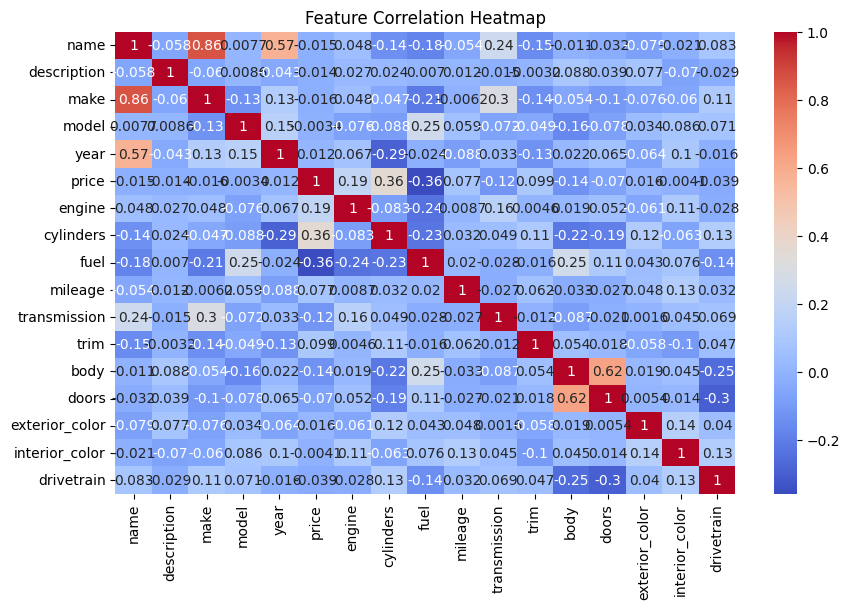

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


Feature Scaling

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['int64','float64']))
scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=['int64','float64']).columns)

print("\n✅ Feature Scaling (Standardization) Done!\n")
print(scaled_df.head())


✅ Feature Scaling (Standardization) Done!

       name  description      make     model      year     price    engine  \
0  0.474831    -0.580298  0.248827  1.566491  0.281354  1.323910 -0.425928   
1  0.391807     0.878836  0.248827 -0.324540  0.281354  0.001988  1.053318   
2 -0.272387    -1.488491 -0.653433  1.771543  0.281354  2.504061  0.434099   
3 -1.849846     1.623468 -0.954186 -0.939695 -3.074795 -0.178470 -0.769939   
4  1.336206    -1.312017  1.451840 -1.554850  0.281354  1.706093 -0.563532   

   cylinders      fuel   mileage  transmission      trim      body     doors  \
0   0.834454  0.195510 -0.114240     -0.116272  1.045435  0.283627  0.204456   
1   0.834454  0.195510 -0.132290     -0.116272 -0.281865  0.283627  0.204456   
2   2.315628  0.195510 -0.134296      1.139581 -0.955726  0.283627  0.204456   
3   2.315628  0.195510 -0.070118     -0.116272  0.269475  0.283627  0.204456   
4   0.834454 -3.138973 -0.114240     -1.082313 -0.343125 -0.497126  0.204456   

   ext

Feature Selection using SelectKBest

In [13]:
target_col = 'price'  # Corrected column name
y = df[target_col]
X = df.drop(target_col, axis=1) # Define X

selector = SelectKBest(score_func=f_regression, k=5)
fit = selector.fit(X, y)
selected_features = X.columns[fit.get_support()]
print("\n✅ Top 5 Selected Features:\n", selected_features)


✅ Top 5 Selected Features:
 Index(['engine', 'cylinders', 'fuel', 'transmission', 'body'], dtype='object')


In [19]:
df_selected = df[selected_features] # Create df_selected from the original df using the selected features
output_file_name = "transformed_vehicle_data_for_model.csv"
df_selected.to_csv(output_file_name, index=False)

print(f"\n✅ Final preprocessed and selected data saved to: {output_file_name}")


✅ Final preprocessed and selected data saved to: transformed_vehicle_data_for_model.csv


In [20]:
from google.colab import files
files.download('transformed_vehicle_data_for_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>